##                  Medical Cost Prediction

## Business/Domain Understanding

# What is Insurance?
Insurance is a contract between two parties whereby one party agrees to undertake the risk of the other in exchange for consideration known as premium and promises to indemnify the party on the happening of an uncertain event. 

# What is health insurance?
A plan that covers or shares the expenses associated with health care can be described as health insurance.

Health insurance in India is an emerging insurance sector after the term life insurance and automobile insurance sector. Rise in the middle class, higher hospitalization cost, expensive health care, digitization and increase in awareness level are some important drivers for the growth of the health insurance market in India.

# Assumption
Assume that Im working as a Data Scientist with one of the world's leading insurance providers (like UnitedHealth Group). 

Insurance companies need to set the insurance premiums following the population trends despite having limited information about the insured population if they have to put themselves in a position to make profits. This makes it necessary to estimate the average medical care expenses based on trends in the population segments.


## Step 1: Load the data and Perform the Basic EDA

In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("insurance.csv")

In [7]:
# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000  

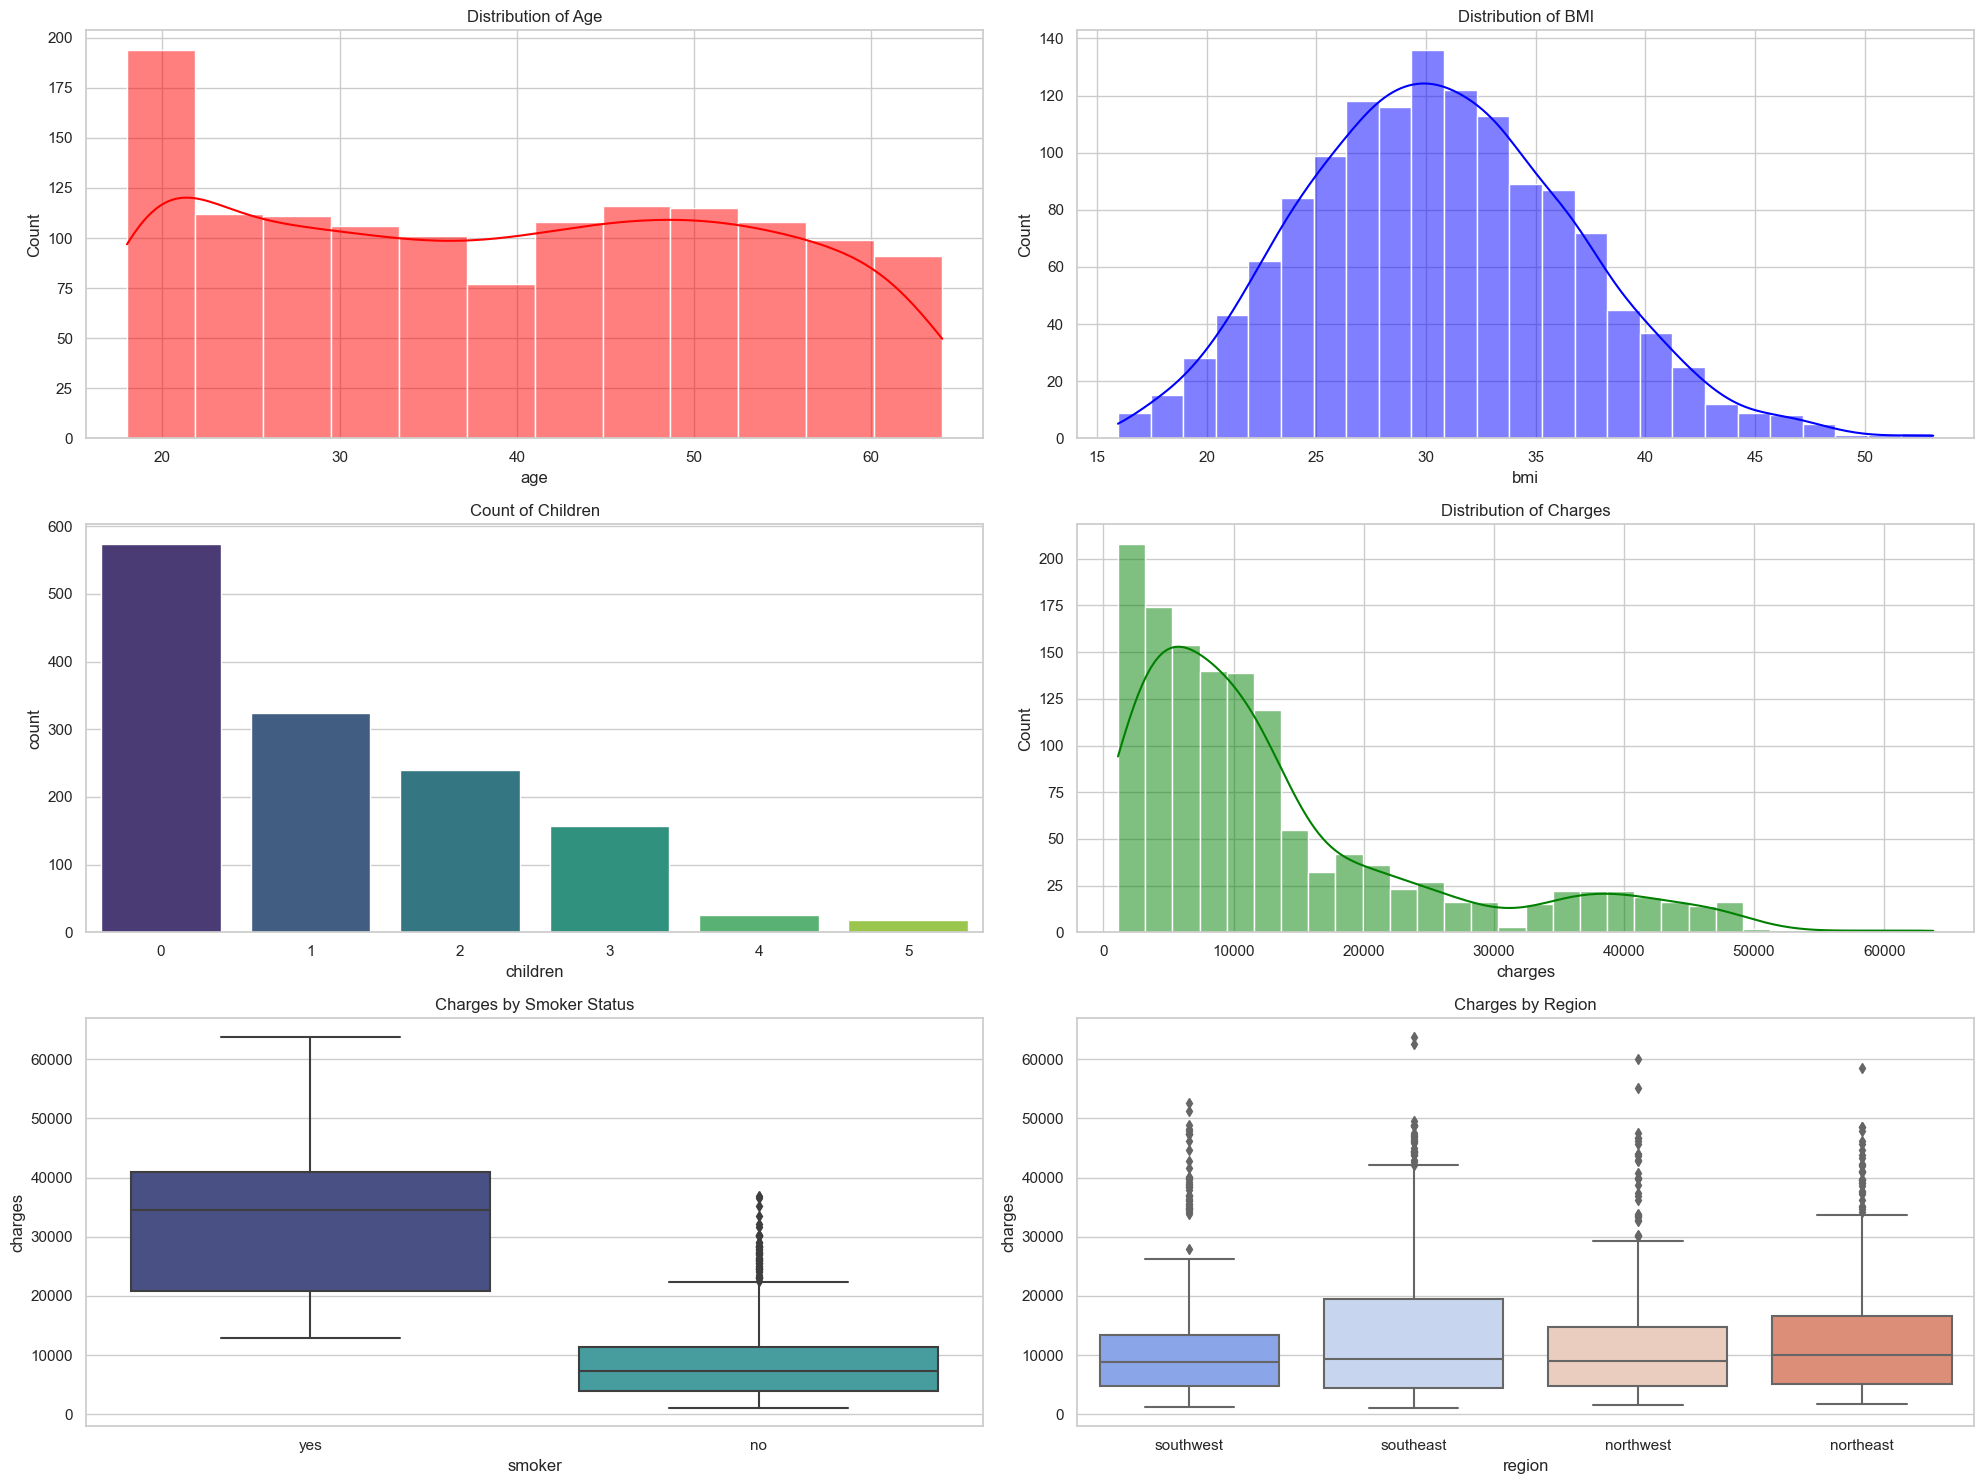

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a figure to hold the subplots
plt.figure(figsize=(20, 15))

# Distribution of 'age'
plt.subplot(3, 2, 1)
sns.histplot(df['age'], kde=True, color='red')
plt.title('Distribution of Age')

# Distribution of 'bmi'
plt.subplot(3, 2, 2)
sns.histplot(df['bmi'], kde=True, color='blue')
plt.title('Distribution of BMI')

# Distribution of 'children'
plt.subplot(3, 2, 3)
sns.countplot(x='children', data=df, palette='viridis')
plt.title('Count of Children')

# Distribution of 'charges'
plt.subplot(3, 2, 4)
sns.histplot(df['charges'], kde=True, color='green')
plt.title('Distribution of Charges')

# Boxplot for 'charges' by 'smoker' status
plt.subplot(3, 2, 5)
sns.boxplot(x='smoker', y='charges', data=df, palette='mako')
plt.title('Charges by Smoker Status')

# Boxplot for 'charges' by 'region'
plt.subplot(3, 2, 6)
sns.boxplot(x='region', y='charges', data=df, palette='coolwarm')
plt.title('Charges by Region')

plt.tight_layout()
plt.show()

## Step 2: Documenting Input & Target Variables

In [17]:
# Input Variables
input_cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
# Output/Target Variable
output_col = 'charges'

## Type of ML Task = Regression

## Evaluation metrics = Mean Absolute Error

## Step 3: Splitting the Data Into Train and Test

In [34]:
from sklearn.model_selection import train_test_split

X = data[input_cols]
y = data[output_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## Step 4: Data Preparation on Train Data

In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Numerical Variables - Standardization
scaler = StandardScaler()
X_train[['age', 'bmi', 'children']] = scaler.fit_transform(X_train[['age', 'bmi', 'children']])


In [36]:
# Categorical Variables - OneHotEncoding
X_train = pd.get_dummies(X_train, columns=['sex', 'smoker', 'region'])

## Step 5: Data Preparation on Test Data

In [45]:
# Apply the same transformations on the test data
# Numerical Variables - Standardization
X_test[['age', 'bmi', 'children']] = scaler.transform(X_test[['age', 'bmi', 'children']])

In [37]:
# Categorical Variables - OneHotEncoding
X_test = pd.get_dummies(X_test, columns=['sex', 'smoker', 'region'])

## Step 6: Model Training Phase

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define models
models = {
    "KNN": KNeighborsRegressor(),
    "Linear Regression": LinearRegression(),
    "Support Vector Machines": SVR(),
    "Decision Trees": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Train models
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model


## Step 7: Predicting and evaluating the each model

In [42]:
from sklearn.metrics import mean_absolute_error
# Predict and evaluate each model
results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = mae
    print(f"{name}: MAE = {mae}")


KNN: MAE = 8824.267581913435
Linear Regression: MAE = 206310.33384978113
Support Vector Machines: MAE = 8510.136835319536
Decision Trees: MAE = 16689.212014958208
Random Forest: MAE = 13385.960248792228


# Step 8: Model Comparison and Conclusion

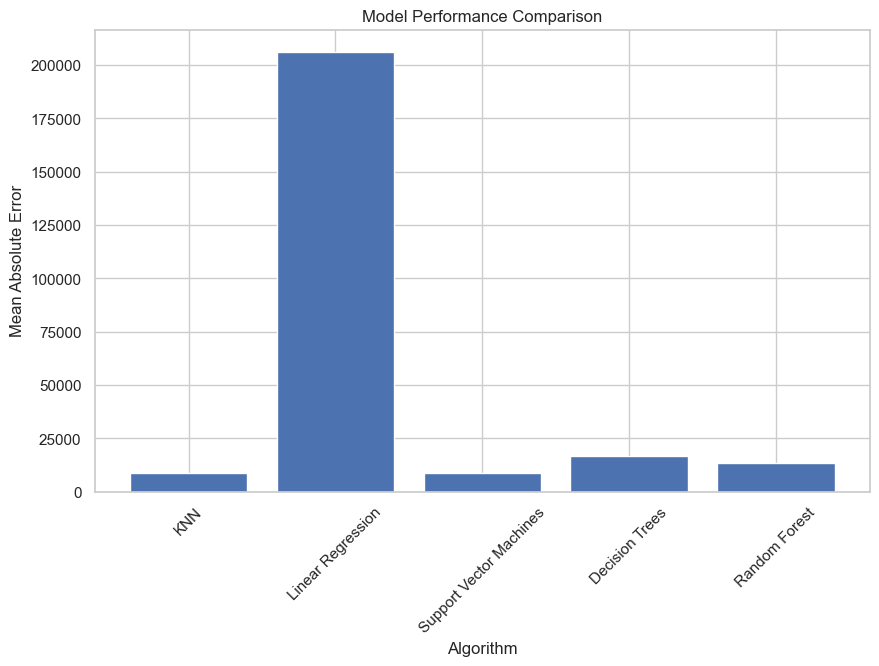

The best algorithm for Medical Cost Prediction is Support Vector Machines with MAE of 8510.136835319536


In [44]:
import matplotlib.pyplot as plt

# Plot the scores achieved by each algorithm
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel('Algorithm')
plt.ylabel('Mean Absolute Error')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

# Conclusion
best_model = min(results, key=results.get)
print(f"The best algorithm for Medical Cost Prediction is {best_model} with MAE of {results[best_model]}")